In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/tlenekksenonu/Downloads/steam_games.csv')

Wczytanie danych

In [7]:
print("Liczba wierszy:", df.shape[0])
print("Liczba kolumn:", df.shape[1])

print("\nBraki danych (w kolumnie):\n", df.isnull().sum())

print("\nTypy zmiennych:\n", df.dtypes)

Liczba wierszy: 71429
Liczba kolumn: 21

Braki danych (w kolumnie):
 steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64

Typy zmiennych:
 steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
tot

Liczba wierszy w zbiorze danych wynosi 71429, kolumn: 21, braków danych przypadających na jedną kolumnę: 0. Typy zmiennych występujących w zbiorze to int64, object, bool i float64.

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
print(df.describe())
print(df.describe(include=['object', 'bool']))


        steam_appid  required_age  n_achievements  total_reviews  total_positive  total_negative  review_score  positive_percentual    metacritic  price_initial (USD)
count  7.142900e+04  71429.000000    71429.000000   7.142900e+04    7.142900e+04    71429.000000  71429.000000         71429.000000  71429.000000         71429.000000
mean   1.613700e+06      2.573227       16.079478   4.102497e+02    3.602238e+02       50.025886      2.192849            46.113290      2.573227             6.528184
std    8.625559e+05     13.591997      138.084319   8.389934e+03    7.409672e+03     1171.055349      3.175885            41.961702     13.591997            13.186426
min    7.300000e+02      0.000000        0.000000   0.000000e+00    0.000000e+00        0.000000      0.000000             0.000000      0.000000             0.000000
25%    9.296400e+05      0.000000        0.000000   0.000000e+00    0.000000e+00        0.000000      0.000000             0.000000      0.000000             0.00000

Zbiór danych zawiera 71 429 wierszy danych dotyczących gier na Steam. Większość gier ma brak ocen, osiągnięć oraz metacritic, co wskazuje na dużą liczbę mniej znanych tytułów. Dominującymi gatunkami są Action i Indie, a najczęstszą kategorią rozgrywki jest tryb jednoosobowy. Średnia cena gry to około 6.53 USD, ale wiele z nich jest darmowych (ponad 61 000 gier ma is_free = False, więc około 13 500 gier jest darmowych). Duża liczba wydawców i deweloperów (odpowiednio 49 545 i 44 187 ) sugeruje silne rozdrobnienie rynku.

In [17]:
numeric_cols = [
    'price_initial (USD)', 'required_age', 'n_achievements',
    'total_reviews', 'total_positive', 'total_negative',
    'review_score', 'positive_percentual', 'metacritic'
]

grouped = df.groupby('is_free')[numeric_cols].mean().round(2)
print(grouped)


         price_initial (USD)  required_age  n_achievements  total_reviews  total_positive  total_negative  review_score  positive_percentual  metacritic
is_free                                                                                                                                                 
False                   7.53          2.89           17.05         443.81          391.72           52.08          2.45                50.80        2.89
True                    0.00          0.55            9.79         192.66          155.98           36.68          0.52                15.71        0.55


Analiza zmiennych numerycznych względem zmiennej jakościowej is_free pokazuje, że gry darmowe mają średnio mniej recenzji, niższy odsetek pozytywnych ocen oraz mniejszą liczbę osiągnięć niż gry płatne. Sugeruje to, że płatne tytuły są częściej doceniane przez graczy, co może wynikać z ich wyższej jakości, większej złożoności lub zaangażowania użytkowników.

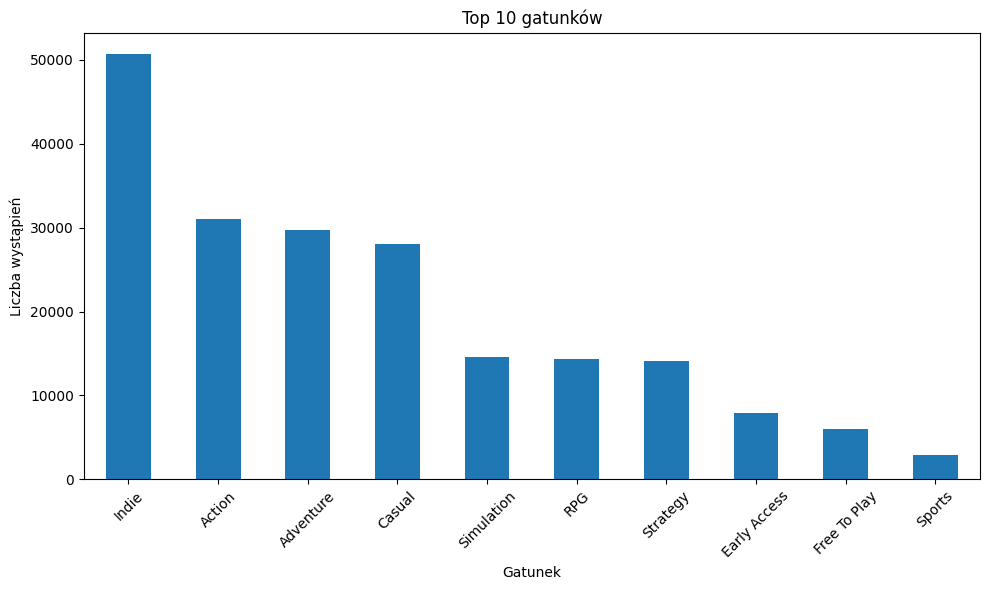

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

df['genre_clean'] = df['genres'].dropna().astype(str) \
    .str.replace(r"[\[\]\'\"]", "", regex=True) \
    .str.strip()

df['genre_split'] = df['genre_clean'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])

all_genres = [g for sublist in df['genre_split'] for g in sublist]
genre_counts = Counter(all_genres)

plt.figure(figsize=(10,6))
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 gatunków')
plt.xlabel('Gatunek')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analiza gatunków gier pokazuje, że najczęściej występującym gatunkiem jest „Indie”, wyraźnie dominując nad pozostałymi kategoriami, takimi jak „Action”, „Adventure” i „Casual”. Z kolei gatunki „Free to Play” oraz „Sports” pojawiają się znacznie rzadziej, co może świadczyć o ich mniejszej popularności lub niższej reprezentacji w zbiorze danych.

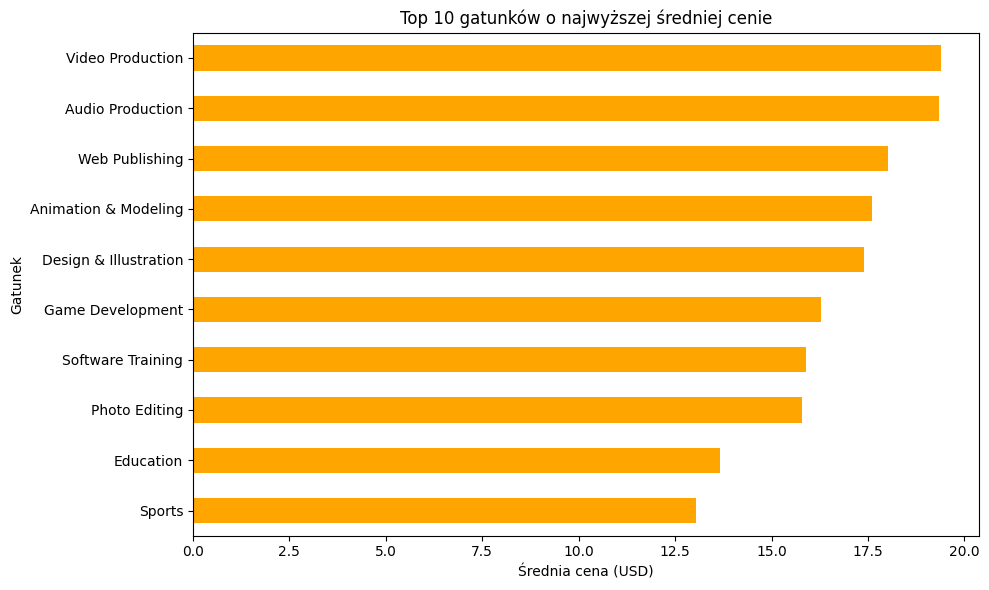

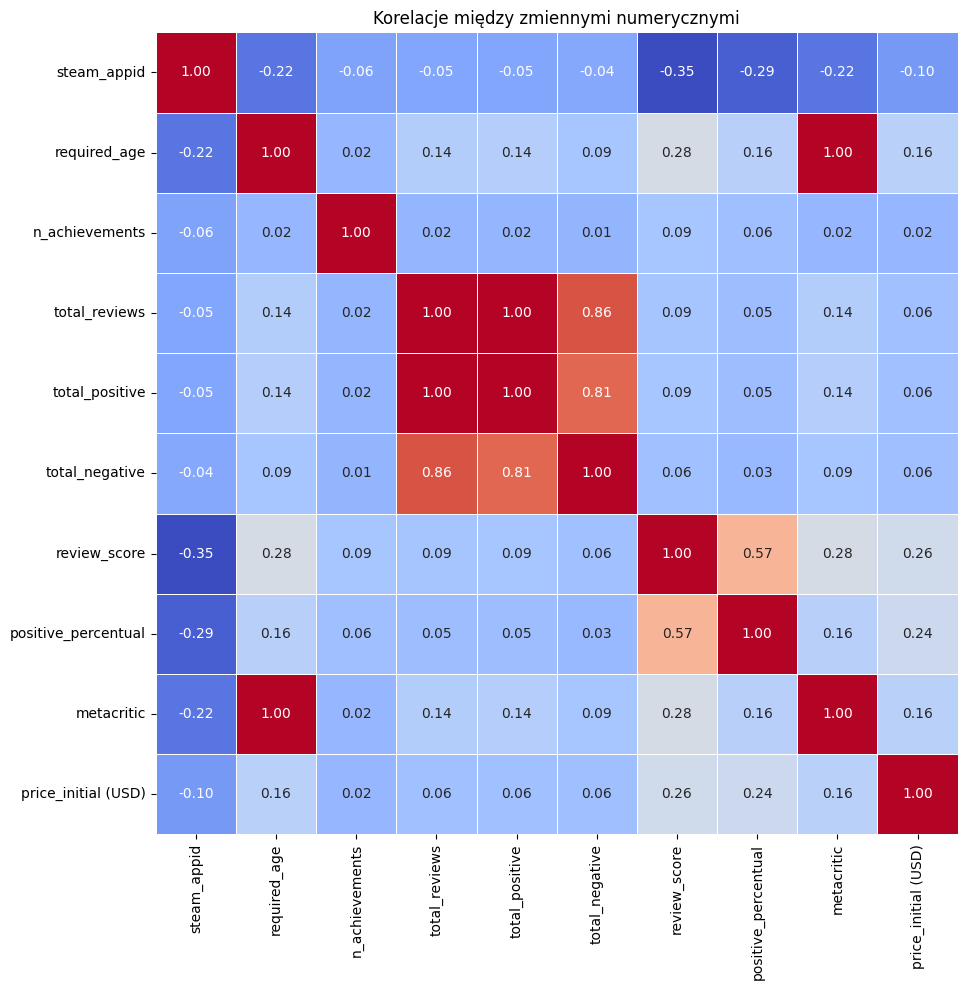

In [39]:
import seaborn as sns
from collections import Counter

df_exploded = df.explode('genre_split')
df_exploded = df_exploded[df_exploded['genre_split'].notnull()]
df_exploded = df_exploded[df_exploded['genre_split'].str.strip() != '']

# Oblicz średnią cenę dla każdego gatunku
avg_price_per_genre = df_exploded.groupby('genre_split')['price_initial (USD)'].mean().sort_values(ascending=False).head(10)

# Wykres
plt.figure(figsize=(10,6))
avg_price_per_genre.plot(kind='barh', color='orange')
plt.title('Top 10 gatunków o najwyższej średniej cenie')
plt.xlabel('Średnia cena (USD)')
plt.ylabel('Gatunek')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

numeric_cols = df.select_dtypes(include='number')

# Oblicz macierz korelacji
correlation = numeric_cols.corr()

# Wykres heatmapy
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar=False)
plt.title('Korelacje między zmiennymi numerycznymi')
plt.tight_layout()
plt.show()




Pierwszy wykres wskazuje, że najwyższe średnie ceny osiągają usługi z zakresu produkcji wideo i audio, co może świadczyć o ich wysokiej wartości rynkowej i specjalistycznym charakterze. Z kolei najniższe stawki występują w kategoriach sportowych i edukacyjnych, co może wynikać z większej konkurencji lub mniejszego zapotrzebowania na tego typu treści.

Drugi wykres pokazuje silną dodatnią zależność między liczbą recenzji a liczbą pozytywnych i negatywnych opinii. Stosunkowo silna korelacja występuje także między wynikiem recenzji a procentem pozytywnych ocen, co sugeruje, że te zmienne mierzą podobne aspekty opinii użytkowników.